In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load Data in a Pandas Dataframe
import seaborn as sns #just to make our visualization prettier ;-) 
import glob
import math
import matplotlib.pyplot as plt
%matplotlib inline


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "."]).decode("utf8"))

P1.ipynb
README.md
aclImdb
cleaned_data
geodata.ipynb
main.py
movie_data.csv
raw_data
related_references
scripts
tfm.Rproj
useful_references
weatherdata.ipynb



In [12]:
path = r'raw_data/weather.csv' # use your path
allFiles = glob.glob(path)
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    # Weather condition in String
    # Temperature in C
    # Wind Speed in kph
    # Humidity in %
    # Visibility in km
    df.columns = ["DateTime", "Condition", "Temperature", "Wind", "Humidity", "Visibility"]
    list_.append(df)
df = pd.concat(list_, sort=True)

print(len(df))
print(type(df.loc[0,'DateTime']))

df['DateTime']  = pd.to_datetime(df['DateTime'])

print(type(df.loc[0,'DateTime']))

df.head()

32758
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Condition,DateTime,Humidity,Temperature,Visibility,Wind
0,Overcast,2016-01-01 01:51:00,53,5.0,16.1,5.6
1,Overcast,2016-01-01 02:51:00,55,5.0,16.1,7.4
2,Overcast,2016-01-01 03:51:00,55,5.0,16.1,14.8
3,Overcast,2016-01-01 04:51:00,58,4.4,16.1,16.7
4,Overcast,2016-01-01 05:51:00,58,4.4,16.1,11.1


In [3]:
df.describe()

,Humidity,Temperature,Visibility,Wind
count,32758.000000,32758.000000,32481.000000,29858.000000
mean,67.550461,13.365514,13.192707,8.279285
std,20.688701,9.501712,4.725070,6.134395
min,9.000000,-18.300000,0.400000,0.000000
25%,51.000000,5.600000,11.300000,5.600000
50%,68.000000,13.300000,16.100000,7.400000
75%,87.000000,21.700000,16.100000,11.100000
max,100.000000,35.600000,16.100000,137.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32758 entries, 0 to 32757
Data columns (total 6 columns):
Condition      32548 non-null object
DateTime       32758 non-null datetime64[ns]
Humidity       32758 non-null int64
Temperature    32758 non-null float64
Visibility     32481 non-null float64
Wind           29858 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [6]:
print(df.isnull().sum())
print('Contains ', sum(df.isnull().sum()), ' NULL values. Need to impute :', sum(df.isnull().sum())>0)

Condition       210
DateTime          0
Humidity          0
Temperature       0
Visibility      277
Wind           2900
dtype: int64
Contains  3387  NULL values. Need to impute : True


In [6]:
df['Condition'].value_counts()

Clear                  12665
Overcast                9173
Light Rain              2651
Mostly Cloudy           2603
Partly Cloudy           1543
Scattered Clouds        1285
Rain                     783
Light Snow               605
Haze                     538
Heavy Rain               443
Snow                     149
Heavy Snow                31
Light Freezing Rain       29
Mist                      28
Fog                       18
Light Freezing Fog         4
Name: Condition, dtype: int64

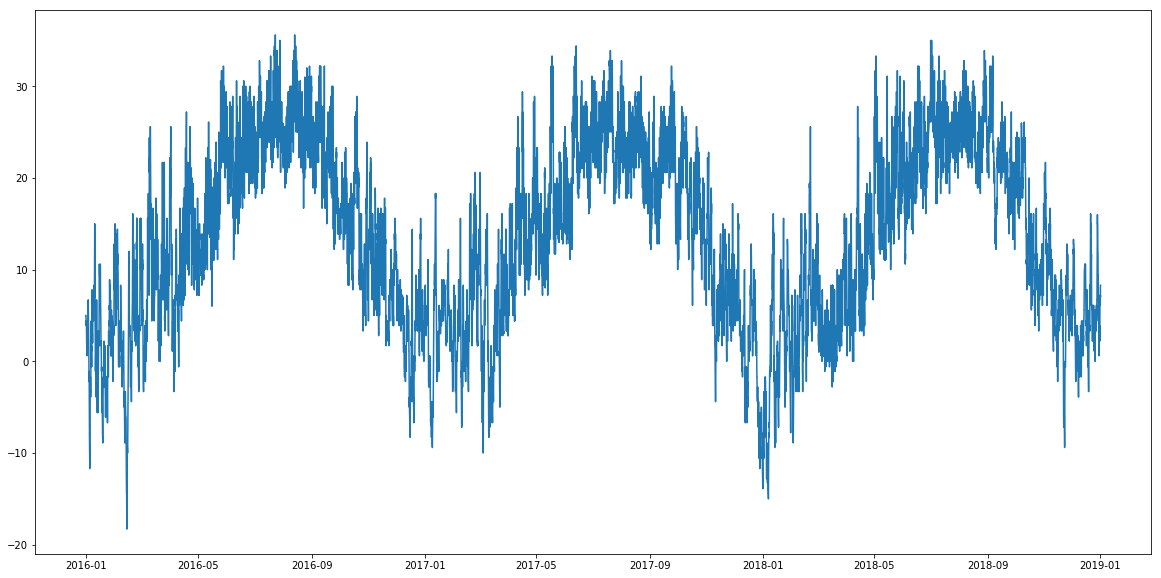

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['Temperature'])
plt.show()

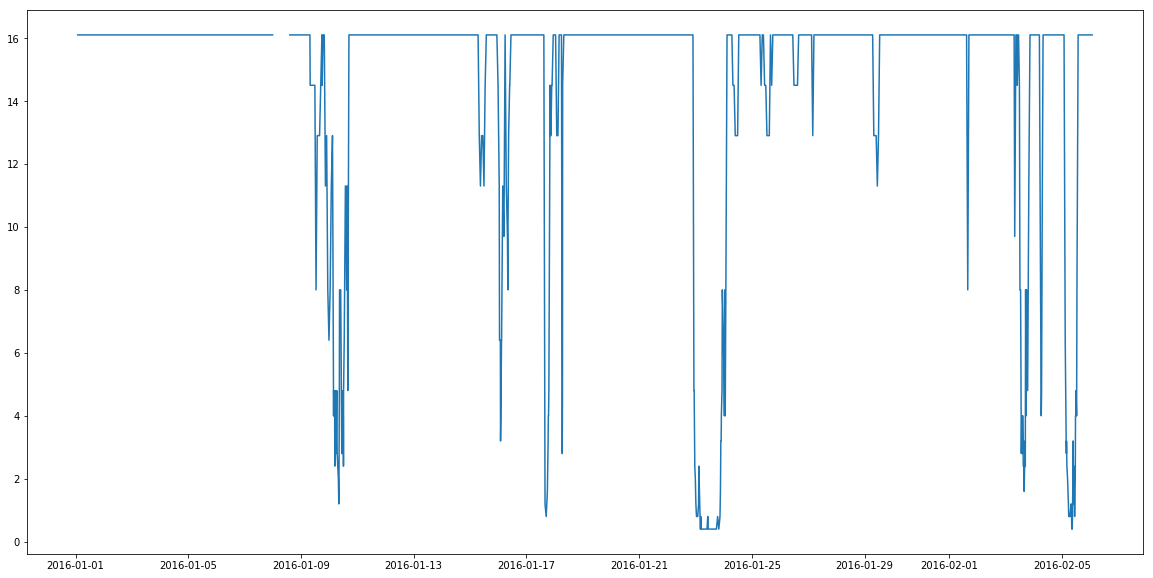

In [8]:
plt.figure(figsize=(20,10))
plt.plot(df.head(1000)['DateTime'], df.head(1000)['Visibility'])
plt.show()

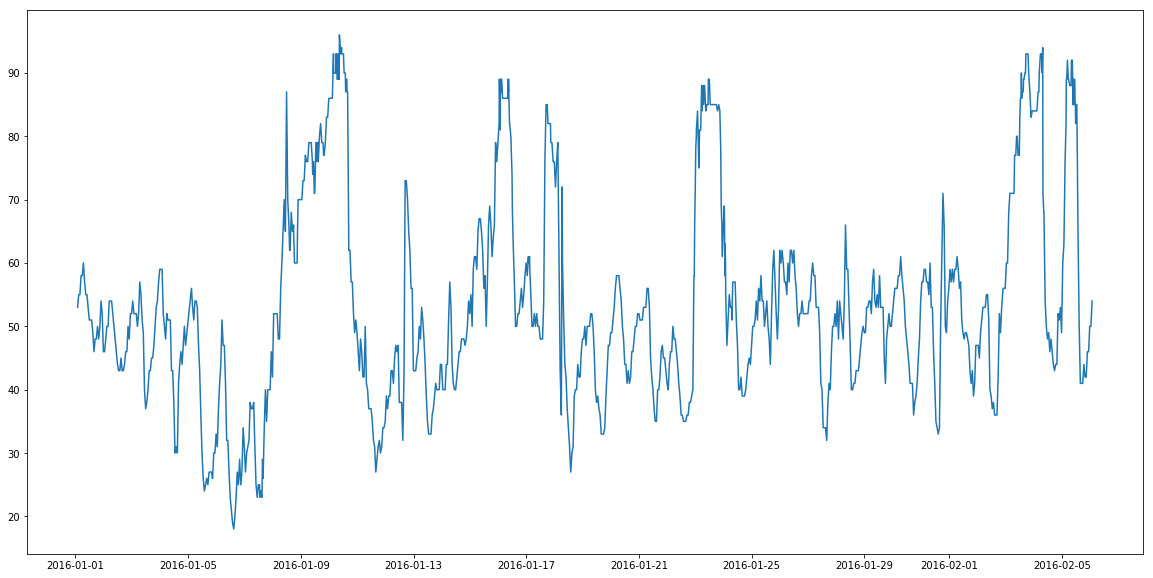

In [9]:
plt.figure(figsize=(20,10))
plt.plot(df.head(1000)['DateTime'], df.head(1000)['Humidity'])
plt.show()

In [10]:
NaNs = df['Visibility'].isnull()
df[NaNs]

,Condition,DateTime,Humidity,Temperature,Visibility,Wind
167,NaN,2016-01-08 00:51:00,52,3.0,NaN,NaN
168,NaN,2016-01-08 01:51:00,52,3.0,NaN,NaN
169,NaN,2016-01-08 02:51:00,52,3.0,NaN,NaN
170,NaN,2016-01-08 03:51:00,52,2.0,NaN,NaN
171,NaN,2016-01-08 04:51:00,48,2.0,NaN,NaN
172,NaN,2016-01-08 05:51:00,48,2.0,NaN,NaN
173,NaN,2016-01-08 06:51:00,56,2.0,NaN,NaN
174,NaN,2016-01-08 07:51:00,60,3.0,NaN,NaN
175,NaN,2016-01-08 09:51:00,70,4.0,NaN,NaN
176,NaN,2016-01-08 10:51:00,65,5.0,NaN,NaN


In [11]:
df['Visibility'].interpolate(method="linear", inplace=True)

In [12]:
df[NaNs]

,Condition,DateTime,Humidity,Temperature,Visibility,Wind
167,NaN,2016-01-08 00:51:00,52,3.0,16.100000,NaN
168,NaN,2016-01-08 01:51:00,52,3.0,16.100000,NaN
169,NaN,2016-01-08 02:51:00,52,3.0,16.100000,NaN
170,NaN,2016-01-08 03:51:00,52,2.0,16.100000,NaN
171,NaN,2016-01-08 04:51:00,48,2.0,16.100000,NaN
172,NaN,2016-01-08 05:51:00,48,2.0,16.100000,NaN
173,NaN,2016-01-08 06:51:00,56,2.0,16.100000,NaN
174,NaN,2016-01-08 07:51:00,60,3.0,16.100000,NaN
175,NaN,2016-01-08 09:51:00,70,4.0,16.100000,NaN
176,NaN,2016-01-08 10:51:00,65,5.0,16.100000,NaN


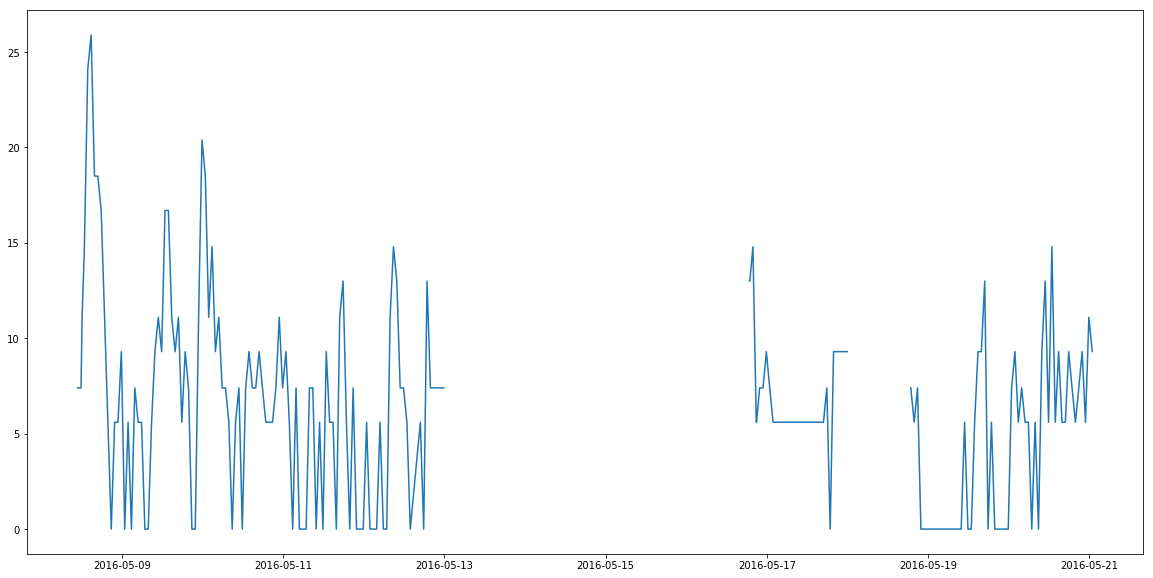

In [13]:
plt.figure(figsize=(20,10))
plt.plot(df[3700:4000]['DateTime'], df[3700:4000]['Wind'])
plt.show()

In [14]:
df['Wind'].interpolate(method="linear", inplace=True)
#df['Wind'].rolling(min_periods=1, center=True, window=48).mean()

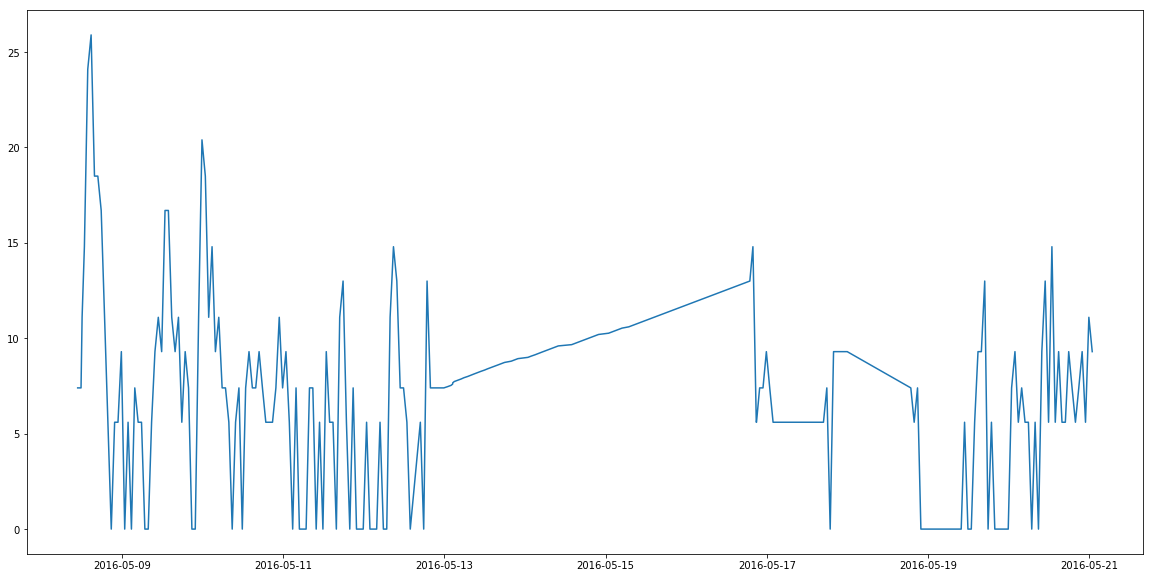

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df[3700:4000]['DateTime'], df[3700:4000]['Wind'])
plt.show()

In [19]:
!Rscript preprocess.R raw_data/weather.csv cleaned_data/weather.csv

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: foreach
Loading required package: itertools
Loading required package: iterators
                DateTime             Condition      Temperature    
 2016-03-14 00:51:00:    2   Clear        :12665   Min.   :-18.30  
 2016-11-06 01:51:00:    2   Overcast     : 9174   1st Qu.:  5.60  
 2017-03-13 00:51:00:    2   Light Rain   : 2651   Median : 13.30  
 2017-11-05 01:51:00:    2   Mostly Cloudy: 2603   Mean   : 13.37  
 2018-03-12 00:51:00:    2   Partly Cloudy: 1543   3rd Qu.: 21.70  
 2018-11-04 01:51:00:    2   (Other)      : 3913   Max.   : 35.60  
 (Other)            :32747   NA's         :  210                   
      Wind            Humidity        Visibility   
 Min.   :  0.000   Min.   :  9.00   Min.   : 0.40  
 1st Qu.:  5.600   1st Qu.: 51.00   1st Qu.:11.30  
 Median :  7.400   Median : 68.00   Median :16.10  
 Mean   :  8.279   Mean   : 67

In [20]:
path = r'cleaned_data/weather.csv' # use your path
allFiles = glob.glob(path)
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    # Weather condition in String
    # Temperature in C
    # Wind Speed in kph
    # Humidity in %
    # Visibility in km
    df.columns = ["DateTime", "Condition", "Temperature", "Wind", "Humidity", "Visibility"]
    list_.append(df)
df = pd.concat(list_, sort=True)

print(len(df))

df['DateTime']  = pd.to_datetime(df['DateTime'])
df.head()

32759


,Condition,DateTime,Humidity,Temperature,Visibility,Wind
0,Overcast,2016-01-01 00:51:00,51,5.6,16.1,7.4
1,Overcast,2016-01-01 01:51:00,53,5.0,16.1,5.6
2,Overcast,2016-01-01 02:51:00,55,5.0,16.1,7.4
3,Overcast,2016-01-01 03:51:00,55,5.0,16.1,14.8
4,Overcast,2016-01-01 04:51:00,58,4.4,16.1,16.7


In [21]:
df.isnull().sum()

Condition      0
DateTime       0
Humidity       0
Temperature    0
Visibility     0
Wind           0
dtype: int64

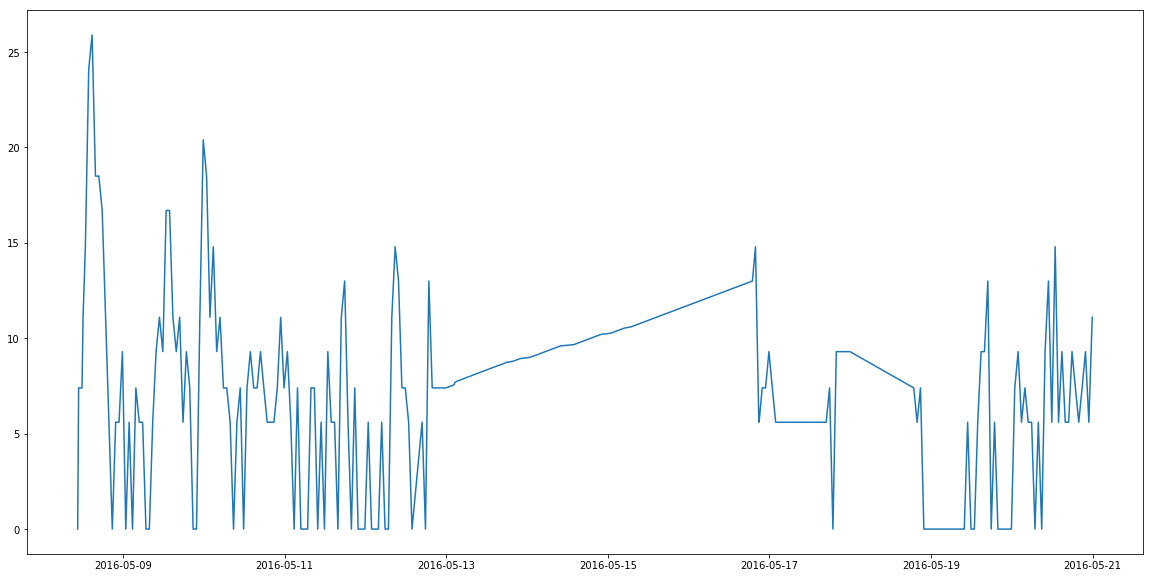

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df[3700:4000]['DateTime'], df[3700:4000]['Wind'])
plt.show()